### **Importing relevant libraries.**

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import geopandas as gpd #powerful Python library built on top of Pandas designed to make working with geospatial data in Python easier
import rasterio as rio #for reading and writing geospatial raster data, specifically designed to work with formats such as GeoTIFF.

import pyogrio as pyg #Python library designed to handle geospatial data input/output operations. 
#import fiona #Python library designed for reading and writing geospatial data in a variety of formats, particularly vector data formats like shapefiles, GeoJSON, and others

from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point

import io

import shapely

#import openpyxl


### **1. Electricity Generation Data.**

#### **electicity_demand.csv**

In [176]:
#loading the dataset
electricity_demand = pd.read_csv("..\data\electricity_generation_data\electricity-demand.csv")

#displaying some rows
electricity_demand

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [177]:
#Filtering to get Kenya alone
ke_electricity_demand = electricity_demand.query("Code=='KEN'")

#diplaying first few rows
ke_electricity_demand.head()

,Entity,Code,Year,Electricity demand - TWh
2784,Kenya,KEN,2000,4.51
2785,Kenya,KEN,2001,4.98
2786,Kenya,KEN,2002,5.37
2787,Kenya,KEN,2003,5.67
2788,Kenya,KEN,2004,6.32


<Axes: xlabel='Year'>

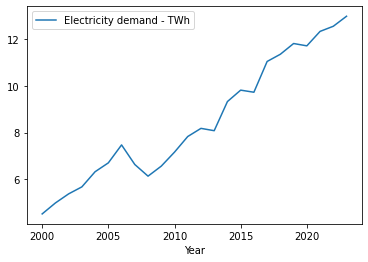

In [178]:
ke_electricity_demand.plot(x='Year', y='Electricity demand - TWh')

In [186]:
ke_electricity_demand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2784 to 2807
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    24 non-null     object 
 1   Code                      24 non-null     object 
 2   Year                      24 non-null     int64  
 3   Electricity demand - TWh  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 960.0+ bytes


In [185]:
ke_electricity_demand.describe()

,Year,Electricity demand - TWh
count,24.000000,24.000000
mean,2011.500000,8.512917
std,7.071068,2.653732
min,2000.000000,4.510000
25%,2005.750000,6.500000
50%,2011.500000,7.955000
75%,2017.250000,11.127500
max,2023.000000,12.990000


In [187]:
ke_electricity_demand.columns

Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh'], dtype='object')

In [194]:
ke_electricity_demand.shape

(24, 4)

In [212]:
# Check for null values in each column
null_values = ke_electricity_demand.isnull().sum()
null_values

Entity                      0
Code                        0
Year                        0
Electricity demand - TWh    0
dtype: int64

#### **electricity_generation.csv**

In [180]:
#loading the dataset
electricity_generation = pd.read_csv("..\data\electricity_generation_data\electricity-generation.csv")

#displaying some rows
electricity_generation

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [181]:
#filtering to get Kenya alone
ke_electricity_generation = electricity_generation.query("Code=='KEN'")

#displaying first few rows
ke_electricity_generation.head()

,Entity,Code,Year,Electricity generation - TWh
3501,Kenya,KEN,2000,4.31
3502,Kenya,KEN,2001,4.81
3503,Kenya,KEN,2002,5.15
3504,Kenya,KEN,2003,5.48
3505,Kenya,KEN,2004,6.16


<Axes: xlabel='Year'>

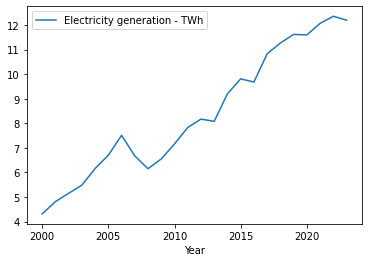

In [182]:
ke_electricity_generation.plot(x='Year', y='Electricity generation - TWh')

In [190]:
ke_electricity_generation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 3501 to 3524
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        24 non-null     object 
 1   Code                          24 non-null     object 
 2   Year                          24 non-null     int64  
 3   Electricity generation - TWh  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 960.0+ bytes


In [191]:
ke_electricity_generation.describe()

,Year,Electricity generation - TWh
count,24.000000,24.000000
mean,2011.500000,8.390417
std,7.071068,2.583438
min,2000.000000,4.310000
25%,2005.750000,6.452500
50%,2011.500000,7.955000
75%,2017.250000,10.940000
max,2023.000000,12.360000


In [192]:
ke_electricity_generation.columns

Index(['Entity', 'Code', 'Year', 'Electricity generation - TWh'], dtype='object')

In [193]:
ke_electricity_generation.shape

(24, 4)

In [211]:
# Check for null values in each column
null_values = ke_electricity_generation.isnull().sum()
null_values

Entity                          0
Code                            0
Year                            0
Electricity generation - TWh    0
dtype: int64

##### **Merging Kenya electricity demand and Kenya electricity generation on YEAR column**

In [198]:
merged_df = pd.merge(ke_electricity_demand, ke_electricity_generation, on=['Year', 'Code', 'Entity'], how='inner')
merged_df.head()

,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
0,Kenya,KEN,2000,4.51,4.31
1,Kenya,KEN,2001,4.98,4.81
2,Kenya,KEN,2002,5.37,5.15
3,Kenya,KEN,2003,5.67,5.48
4,Kenya,KEN,2004,6.32,6.16


<Axes: xlabel='Year'>

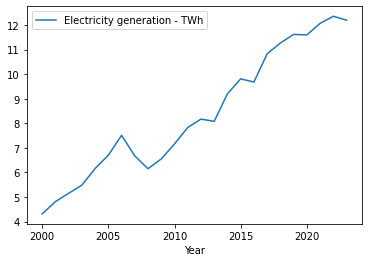

In [199]:
merged_df.plot(x='Year', y='Electricity generation - TWh')

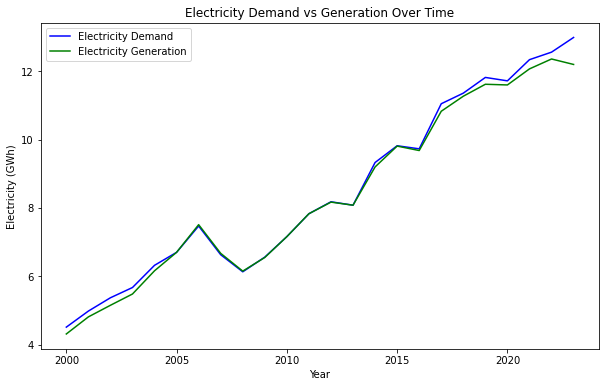

In [206]:
plt.figure(figsize=(10, 6))

# Plot electricity demand over time
plt.plot(merged_df['Year'], merged_df['Electricity demand - TWh'], label='Electricity Demand', color='blue')

# Plot electricity generation over time
plt.plot(merged_df['Year'], merged_df['Electricity generation - TWh'], label='Electricity Generation', color='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Electricity (GWh)')
plt.title('Electricity Demand vs Generation Over Time')
plt.legend()

# Display the plot
plt.show()

### **2. Grid Infrastructure Data.**

#### **global_1_1_1_1_1_0.tif**

In [24]:
import rasterio

# Open the TIFF file
with rasterio.open(r"C:\Users\User\Documents\Energy-Access-and-Electrification-planning\data\grid_infrustructure_data\global_data\global_1_1_1_1_1_0.tif") as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])


Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 24527, 'height': 8674, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009999999999999998, 0.0, -89.335692917,
       0.0, -0.01, 51.90425168)}
Dimensions (Height x Width): 8674 x 24527
Number of Bands: 1
Coordinate Reference System (CRS): EPSG:4326
Affine Transformation: | 0.01, 0.00,-89.34|
| 0.00,-0.01, 51.90|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


### **3. Income Level Data**

#### **GSAP_AM24_2021.shp**

In [116]:
ke_counties = gpd.read_file('..\data\income_level_data\GSAP_AM24_2021.shp', engine='pyogrio',
                                   where="code='KEN'")

In [117]:
ke_counties.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.73880 -0.19544, 35.72428 -0..."
1,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
2,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
3,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
4,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


<Axes: >

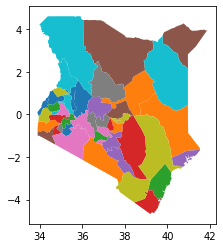

In [118]:
ke_counties.plot(column='geo_name')

### **4. Population Density Data.**

In [208]:
ke_pop_density= gpd.read_file('..\data\pop_density_data\Kenya_pop_data.csv', engine='pyogrio')
ke_pop_density.head()

,X,Y,Z
0,35.2445831961176026,5.46208351911385481,52.6680107116699219
1,35.2529165294175968,5.46208351911385481,42.5668067932128906
2,35.2612498627175981,5.46208351911385481,39.3040504455566406
3,35.2695831960175994,5.46208351911385481,41.8510665893554688
4,35.2779165293176007,5.46208351911385481,38.2382888793945312


In [123]:
ke_pop_density = ke_pop_density.astype({
    'X':float,
    'Y':float,
    'Z':float})

```
ke_pop_density['location'] = ke_pop_density.apply(lambda r: shapely.points(r['X'], r['Y']), axis=1)
ke_pop_density.set_geometry('location')
```


In [142]:
ke_pop_df = gpd.GeoDataFrame(
    ke_pop_density, geometry=gpd.points_from_xy(ke_pop_density.X, ke_pop_density.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})

ke_pop_df.head()

,Density,geometry
0,52.668011,POINT (35.24458 5.46208)
1,42.566807,POINT (35.25292 5.46208)
2,39.304050,POINT (35.26125 5.46208)
3,41.851067,POINT (35.26958 5.46208)
4,38.238289,POINT (35.27792 5.46208)


In [150]:
ke_pop_df.Density.describe(percentiles=[.95])

count    680262.000000
mean         95.214693
std         661.822734
min           0.000000
50%          12.548709
95%         438.835638
max      167454.390625
Name: Density, dtype: float64

<Axes: >

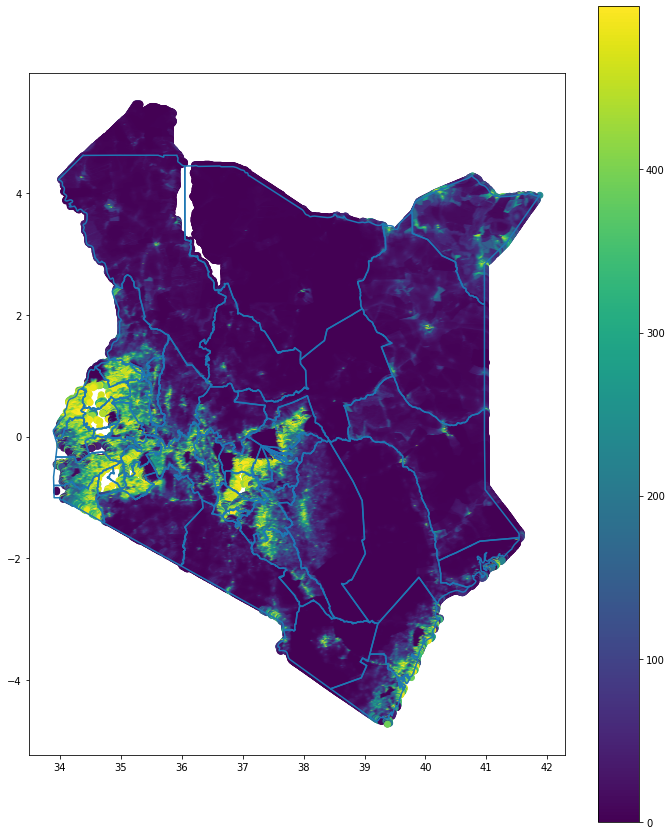

In [152]:
base = ke_counties.boundary.plot(figsize=(12, 15))
ke_pop_df.query('Density<500').plot(ax=base, column='Density', legend=True)